<a href="https://colab.research.google.com/github/Ksenia-90/Machine_learning-_in_business/blob/lesson_9/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/dipam7/student-grade-prediction?select=student-mat.csv

##**Student Grade Prediction**##
###**Predict the final grade of Portugese high school students**###

##Анализ data##

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

matplotlib.rcParams['figure.figsize'] = (14,8) 
warnings.filterwarnings('ignore') 
sns.set_style('darkgrid')

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/student-mat.csv")

In [86]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [87]:
print("Row:", df.shape[0])
print("Column:", df.shape[1])

Row: 395
Column: 33


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [89]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [90]:
col_drop=['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc']
df.drop(col_drop, axis=1, inplace=True)

In [91]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

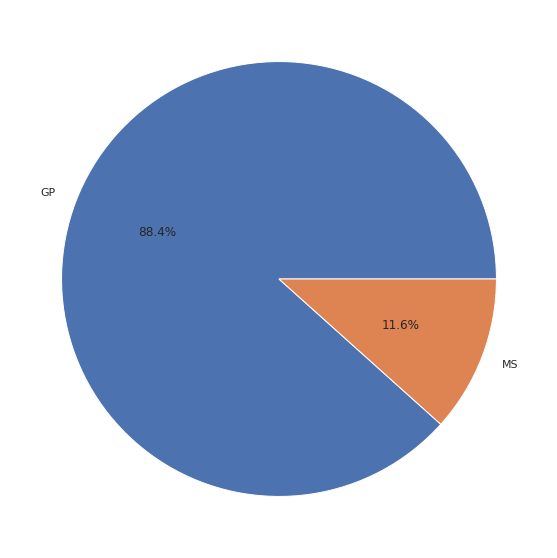

In [92]:
sch = df.school.value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=sch.values(), labels=sch.keys(), autopct='%1.1f%%')
plt.show()

видно что большнство учеников посещают GP (88.4%)

In [93]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

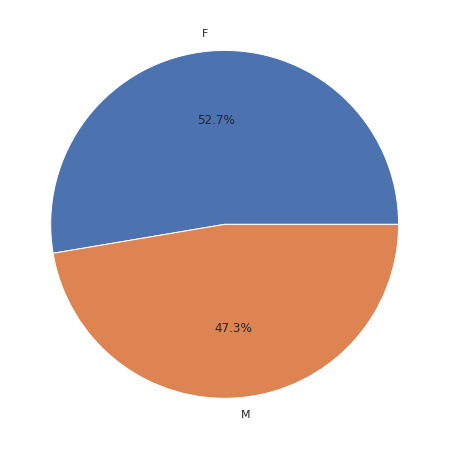

In [94]:
sex = df.sex.value_counts().to_dict()
plt.figure(figsize=(8,8))
plt.pie(x=sex.values(), labels=sex.keys(), autopct='%1.1f%%')
plt.show()

Из графика видно, что студентов (52.7%) больше, чем студенток (47.3%)

In [95]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

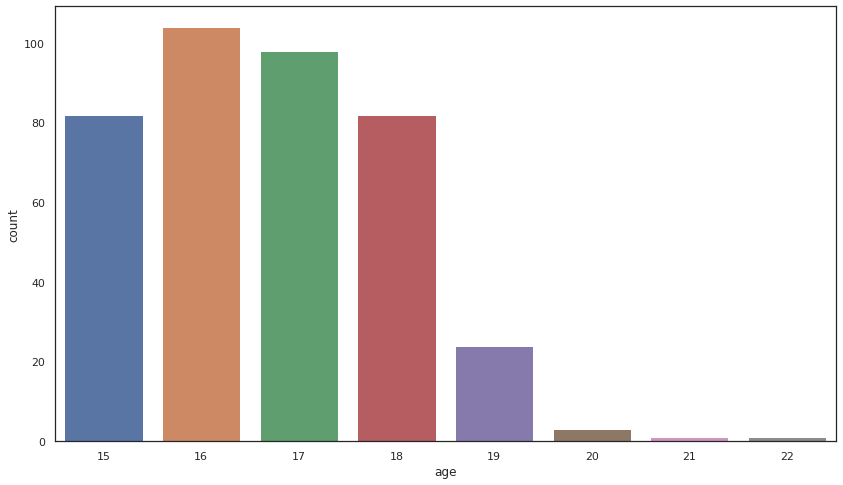

In [96]:
plt.figure(figsize=(14,8))
sns.set(style='white')
sns.countplot(df.age)

Из графика видно, что диапазон учащихся составляет от 15 до 22 лет. Наибольшее количесто студентов в возрасте 16 -17 лет, наименьшие 20-22 лет.

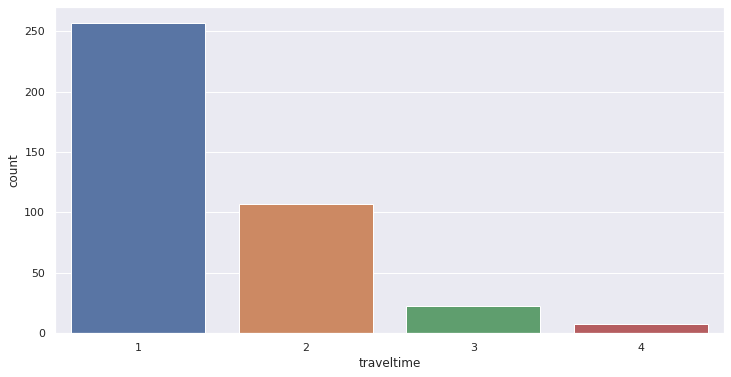

In [97]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.countplot(df['traveltime'])

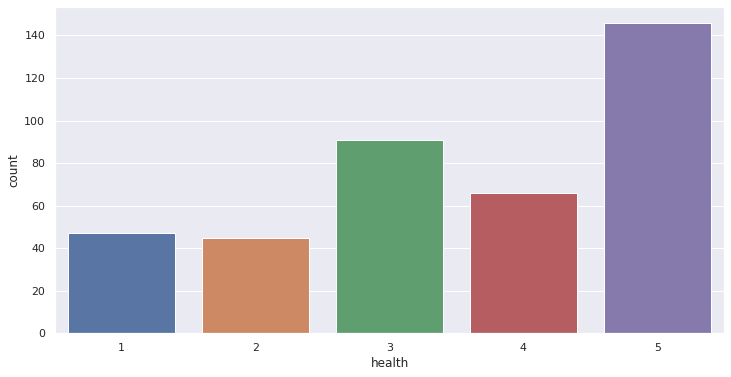

In [103]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.countplot(df['health'])

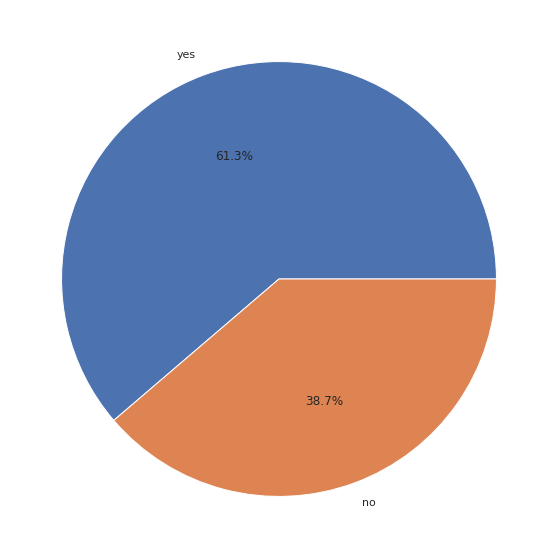

In [105]:
fup = df.famsup.value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=fup.values(), labels=fup.keys(), autopct='%1.1f%%')
plt.show()

Построение модели RandomForestRegressor

In [106]:
df_ml = df[['studytime', 'failures',
            'health', 'absences', 'traveltime', 
            'G1', 'G2', 'G3']]

In [107]:
X = df_ml.iloc[:, :-1].values
y = df_ml.iloc[:, -1].values

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [109]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [110]:
y_rf_pred = rf_model.predict(X_test)

In [111]:
score = (r2_score(y_test, y_rf_pred))

In [112]:
print("RF_Score:", score)

RF_Score: 0.8765592901107656


**Вывод: Лучшим алгоритмом для прогнозирования оценки в этом случае является случайный лес с 0.8765592901107656 в прогнозах.**